In [1]:
%cd ..

/home/bookfinder


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
dir_annotations = Path('data/00_annotations/03_book_binary/')

path = dir_annotations/'hnbook_binary_calibrate.jsonl'

In [4]:
df = pd.read_json(path, lines=True)

In [5]:
df = pd.concat([df, df.meta.apply(pd.Series)], axis=1)

In [6]:
df.answer.value_counts()

reject    177
accept     18
ignore      5
Name: answer, dtype: int64

In [7]:
df['binary'] = df['answer'] == 'accept'
df.loc[df.answer=='ignore', 'binary'] = np.nan

df.binary.value_counts()

False    177
True      18
Name: binary, dtype: int64

In [8]:
calib_prob = (
    df
    .groupby('prob_group')
    .agg(p=('binary', 'mean'),
         n=('binary', 'count'),
         p_pred=('prob', 'mean'))
)
calib_prob

,p,n,p_pred
prob_group,,,
0.0,0.000000,20,0.053331
1.0,0.000000,20,0.132791
2.0,0.050000,20,0.241222
3.0,0.105263,19,0.336504
4.0,0.050000,20,0.443482
5.0,0.105263,19,0.542699
6.0,0.000000,20,0.646291
7.0,0.200000,20,0.758897
8.0,0.111111,18,0.851050


There is a low probability for <70%, and an increasing probability for >70%

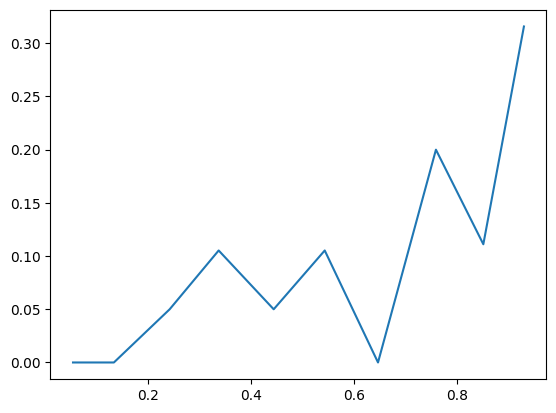

In [9]:
import matplotlib.pyplot as plt

plt.plot(calib_prob.p_pred, calib_prob.p)

Looking into the examples the higher probability ones are more likely to be

In [10]:
pd.options.display.max_colwidth = 1000
df.loc[df.binary==1].sort_values('prob')[['text', 'prob']]

,text,prob
116,One of my favourite parts of Blade Runner 2048 is where they show the insect farms.\n\nCould you imagine the total cost of replacing biological systems with man-made ones? We are playing with fire.,0.219741
142,"> After some reflection, I've removed this Easter egg. It'll be gone in the upcoming man-db 2.8.0.\n\nOh well, it was quite funny while it lasted. I like to imagine a person searching ""man gimme gimme gimme after midnight"" and being, for lack of a better word, rickrolled with that ABBA song.",0.301379
117,">Many video games have very poor or bare plots, but amazing settings.\n\nCyberpunk 2077 is also a great example of this trope. Night City itself is magnificent, and the missions aren't half bad either, but the main storyline is tiresome and has no satisfactory outcome. It feels as if they tried to have a deep plot but ended up botching it.",0.334751
198,">I’m going to get skewered for saying this … but the story feels like it’s pandering to current social political trends - i.e. the obsession with diversity\n\nHow so? I didn't get that feeling at all from Horizon Zero Dawn.\n\nIf someone told me HZD had an obsession with diversity I'd react with a standard ""wat?"". I do agree that some of the forced diversity in modern stories is annoying, mind you. I just didn't get that vibe from that one story.",0.418401
143,"I think that's correct with some overlap, yes. Zig's explicit goal - as stated by the creator - is to replace C. Nothing more, nothing less.\n\nI feel like Rust wants to replace C but it also wants to replace C++. And given the complexity difference between the two languages, that means that Rust will end up closer to C++ than to C.\n\nSo there's some overlap based on how Rust positions itself, but not based on how Zig positions itself.",0.537823
140,"For someone like me who doesn't really like the passive experience of movies/TV, story-heavy games are a good thing. What Remains of Edith Finch is one of my favorite games of all time.",0.577584
153,"I would personally classify interactive fiction closer to games, unless you count gamebooks in that, which I consider closer to books. There was also a movie where you get to get choices linked to Black Mirror that was popular recently, and a few people on youtube explored this by making different videos and letting you pick ""what happens next"".\n\nThere's also the whole genre of visual novels, mostly from Japan. I'm not sure if they are more games, books or interactive fiction.",0.713569
191,"People still play HoMM 3 from 1999 - both as a hobby in large numbers, and professionally. New content is being created.\n\nMaster of Magic gets a new life with bugfix/balance patches and addons. It's from 1993.",0.738065
115,"I'll leave a differing opinion on Earth. It was the least favourite book that I've read last decade. Felt like some childish revenge fantasy to me. It's been many years now, and I'm still annoyed by it.",0.759348
123,"If you go one level meta, it's not hard to imagine a Ken Thompson ""Reflections on Trusting Trust"" situation where that DNA codes for some brain malware that will inject more malware whenever its host is at work writing software, such as for a DNA sequencer.\n\nhttps://users.ece.cmu.edu/~ganger/712.fall02/papers/p761-thompson.pdf",0.772017


# Export examples for annotation

## Confirmed examples

In [11]:
annotation_files = list(Path('data/00_annotations/03_book_binary/').glob('*.jsonl'))

In [12]:
df_annotated = pd.concat([pd.read_json(f, lines=True) for f in annotation_files])

df_annotated

,text,meta,_input_hash,_task_hash,label,_view_id,answer,_timestamp
0,"Edgar Dijkstra's 1988 Paper ""On the Cruelty of Really Teaching Computer Science""\n\nIt's just a paper, but still I'd recommend it, because it was highly influential. It was indeed so influential that it has its own Wikipedia page: https://en.wikipedia.org/wiki/On_the_Cruelty_of_Really_Teaching_Computer_Science\n\nIn the paper he argues that\n\n- the computer industy has been progressing with exponential growth 1948-1988,\n\n- will continue to do so for decades (he was right in that)\n\n- this rate of progress is unprecedented, and the human brain is unfit to deal with such growth, thus\n\n- the only way to deal with such enormous mount of power is: Mathematics, because proofs are rigorous. (I'm simplifying a bit here.)",{'id': 29315827},1785041567,1383587949,WORK_OF_ART,classification,accept,1668086341
1,"I've been struck by how ugly some stores catering to the poor are. Not ugly because they are cheaply decorated, but intentionally ugly, using things like black on yellow coloring for signage, etc. I guess it's eye-catching, but not in a good way.",{'id': 27651856},1647574332,-771474339,WORK_OF_ART,classification,reject,1668086345
2,I completely misread the title as most nerd-friendly toilet. Like those high tech japanese models with tons of functions...,{'id': 26530597},-895080820,264616600,WORK_OF_ART,classification,reject,1668086347
3,"Scihub has been a life saver for me once I started working on some of the more obscure areas of AI such as signal/time series processing. Anything off the beaten path is locked up behind paywalls, and I'm sorry I ain't paying $40 just to see if someone's paper sucks or not (which 95% of them do, in this particular niche, especially the ones shielded from scrutiny by paywalls).",{'id': 29009317},2092742992,888756534,WORK_OF_ART,classification,reject,1668086352
4,I came across them on TikTok. Seems like a pretty nice and actually well thought out idea. Will be interesting to see if they are able to make something successful out of it.\n\nAlso apparently they are going to run a fundraiser on Kickstarter in January 2022.,{'id': 29173898},-1998768893,1612341585,WORK_OF_ART,classification,reject,1668086356
...,...,...,...,...,...,...,...,...
195,Sounds like you might be interested in the IndieWeb project: https://indieweb.org/,"{'id': 25741321, 'prob_group': 1, 'prob': 0.1649630152}",1533184239,1978233275,WORK_OF_ART,classification,reject,1668833525
196,"Fair criticism. I'm the author, and I hate using interfaces like this, but didn't comment on it probably because I got used to it for this kind of thing.\n\nThe only reason why I defined inventory.DB (https://github.com/henvic/pgxtutorial/blob/main/internal/inventory/service.go#L18-L50) is to be able to test. Otherwise, I'd have skipped it.\n\nI haven't read your article yet, but will do so later and get back to this subject and tell my opinion by the end of the day (on vacation, and need to hurry to catch the train!).","{'id': 29315060, 'prob_group': 3, 'prob': 0.3636388236}",1031708670,377284503,WORK_OF_ART,classification,reject,1668833534
197,"It's highly relevant from a perspective of philosophical and scientific curiosity, and mostly (seemingly) irrelevant from a perspective of practical impact on our lives.\n\nI'm also cautious to jump to such conclusions given how nascent we are technologically, even though the light speed barrier does seem absolute. Our recent ancestors probably would've thought a similar thing about life orbiting a nearby star, and it's only with the hindsight of recent advances that we're able to conclude that that's not as far out of our reach as once believed. Who knows what one million years of additional technological advances will make us capable of?","{'id': 26074398, 'prob_group': 4, 'prob': 0.44821304910000004}",1215479405,776996849,WORK_OF_ART,classification,reject,1668833538
198,">I’m going to get skewered for saying this … but the story fee

In [13]:
df_out = df_annotated.query('answer=="accept"').sample(frac=1)

df_out

,text,meta,_input_hash,_task_hash,label,_view_id,answer,_timestamp
24,"Second this, Becoming Steve Jobs is the superior book. It helped a lot that the authors had interacted with Jobs over decades and also had an understanding of business and technology that Isaacson was missing.\n\nThere’s also an old documentary about the founding of NeXT that does such a great job of showing what it was like to be in the room with him as a member of a small team, and this was before he fully “became” Steve Jobs. People underestimate how much meaning can be found in being pushed hard by someone with a clear and inspiring vision.\n\nhttps://m.youtube.com/watch?v=Udi0rk3jZYM",{'id': 29022116},1941605267,-1015014148,WORK_OF_ART,classification,accept,1668086499
85,This is a solid article and entry point.\n\nA chapter of Carl Miller's Death of the Gods is one of the better narrative deep dives: https://www.amazon.com/Death-Gods-Global-Power-Grab/dp/1785151339\n\nAs well as Chris Horton's piece in MIT Tech Review: https://www.technologyreview.com/2018/08/21/240284/the-simple-but-ingenious-system-taiwan-uses-to-crowdsource-its-laws/,{'id': 29362117},1969860163,1793744831,WORK_OF_ART,classification,accept,1668086830
59,"Thanks for the link.\n\nYou also say ""January 6, 1614"". Very specific again! Where did you get that from? There are no dates that I can see, nevermind the 6th of January.\n\nDid you read the cover page? Not where it confirms that the book is a reproduction of another book held at Chatworth House. Ie not an original.\n\nI mean the bit where it says: ""By the Gentlemen of Graies-Inne, at the Court of White-hall, in the Banquercing House, vpon Twelfe night, 1613.""\n\nHere's a link:\nhttps://www.google.com/books/edition/The_Maske_of_Flowers/qCQ_AQAAMAAJ?hl=en&gbpv=1&bsq=1613\n\nThis says to me that the book although published (perhaps) in 1614 relates to a time in 1613.\n\nWhenever I look into this stuff, I get more uncomfortable.",{'id': 26507628},-789806029,-1144587893,WORK_OF_ART,classification,accept,1668549577
31,"Seems to be quite a bit of early internet nostalgia floating through the noosphere. I happened to catch a bit of the House testimony of tech execs today during lunch, and it certainly feels that the winds are shifting.\n\nIn this vein, I can also recommend this Bloomberg series on the History of Napster. Kind of amazing how stubborn music industry execs and politicians can remain 20 years on. How prescient Steve Jobs was, yet again. And whether the days when a solitary coder in a dorm room could still disrupt an entire industry will be much more insurmountable ;)\n\nhttps://www.youtube.com/watch?v=OHVRItc38-c",{'id': 26586867},-2101954152,-1355236831,WORK_OF_ART,classification,accept,1668086543
151,It might help to better understand the motivations behind unsafe Rust by reading some of The Rustonomicon[1].\n\n[1] https://doc.rust-lang.org/nomicon/,"{'id': 28462072, 'prob_group': 8, 'prob': 0.8789098294000001}",664487247,722766516,WORK_OF_ART,classification,accept,1668833204
...,...,...,...,...,...,...,...,...
31,"If you are interested in the Brazilian prison system you should take a look into this:\n\n[1] - Retratos do Cárcere: https://vimeo.com/383384532, https://www.pandafilmes.com.br/portfolio/retratos-do-carcere\nThis is a series about inmates life's. It start giving a brief overview of the current state of Brazilian prison system, including some history to explain why it is this way. Then it go on to show what really means to be an inmate in Brazil. It shows the conditions inmates have to endure, the treatment inmate's family receives, the role religion has inside Brazilian prisons, etc.\n\n[2] - Central: O Poder das Facções no Maior Presídio do Brasil: https://www.youtube.com/watch?v=7lbSBVpo9JA\nThis is a documentary about the ""Presídio Central"" (https://pt.wikipedia.org/wiki/Pres%C3%ADdio_Central_de_Porto_Alegre) which is the largest prison in the state of Rio Grande Do Sul. The prison is overcrowded and falli

In [14]:
import json

with open('data/02_intermediate/hn_sample_ner_confirmed.jsonl', 'w') as f:
    for id, row in df_out.iterrows():
        data = {"text": row["text"], "meta": {"id": row["meta"]["id"]}}
        print(json.dumps(data), file=f)

In [15]:
pd.read_json('data/02_intermediate/hn_sample_ner_confirmed.jsonl', lines=True)

,text,meta
0,"Second this, Becoming Steve Jobs is the superior book. It helped a lot that the authors had interacted with Jobs over decades and also had an understanding of business and technology that Isaacson was missing.\n\nThere’s also an old documentary about the founding of NeXT that does such a great job of showing what it was like to be in the room with him as a member of a small team, and this was before he fully “became” Steve Jobs. People underestimate how much meaning can be found in being pushed hard by someone with a clear and inspiring vision.\n\nhttps://m.youtube.com/watch?v=Udi0rk3jZYM",{'id': 29022116}
1,This is a solid article and entry point.\n\nA chapter of Carl Miller's Death of the Gods is one of the better narrative deep dives: https://www.amazon.com/Death-Gods-Global-Power-Grab/dp/1785151339\n\nAs well as Chris Horton's piece in MIT Tech Review: https://www.technologyreview.com/2018/08/21/240284/the-simple-but-ingenious-system-taiwan-uses-to-crowdsource-its-laws/,{'id': 29362117}
2,"Thanks for the link.\n\nYou also say ""January 6, 1614"". Very specific again! Where did you get that from? There are no dates that I can see, nevermind the 6th of January.\n\nDid you read the cover page? Not where it confirms that the book is a reproduction of another book held at Chatworth House. Ie not an original.\n\nI mean the bit where it says: ""By the Gentlemen of Graies-Inne, at the Court of White-hall, in the Banquercing House, vpon Twelfe night, 1613.""\n\nHere's a link:\nhttps://www.google.com/books/edition/The_Maske_of_Flowers/qCQ_AQAAMAAJ?hl=en&gbpv=1&bsq=1613\n\nThis says to me that the book although published (perhaps) in 1614 relates to a time in 1613.\n\nWhenever I look into this stuff, I get more uncomfortable.",{'id': 26507628}
3,"Seems to be quite a bit of early internet nostalgia floating through the noosphere. I happened to catch a bit of the House testimony of tech execs today during lunch, and it certainly feels that the winds are shifting.\n\nIn this vein, I can also recommend this Bloomberg series on the History of Napster. Kind of amazing how stubborn music industry execs and politicians can remain 20 years on. How prescient Steve Jobs was, yet again. And whether the days when a solitary coder in a dorm room could still disrupt an entire industry will be much more insurmountable ;)\n\nhttps://www.youtube.com/watch?v=OHVRItc38-c",{'id': 26586867}
4,It might help to better understand the motivations behind unsafe Rust by reading some of The Rustonomicon[1].\n\n[1] https://doc.rust-lang.org/nomicon/,{'id': 28462072}
...,...,...
73,"If you are interested in the Brazilian prison system you should take a look into this:\n\n[1] - Retratos do Cárcere: https://vimeo.com/383384532, https://www.pandafilmes.com.br/portfolio/retratos-do-carcere\nThis is a series about inmates life's. It start giving a brief overview of the current state of Brazilian prison system, including some history to explain why it is this way. Then it go on to show what really means to be an inmate in Brazil. It shows the conditions inmates have to endure, the treatment inmate's family receives, the role religion has inside Brazilian prisons, etc.\n\n[2] - Central: O Poder das Facções no Maior Presídio do Brasil: https://www.youtube.com/watch?v=7lbSBVpo9JA\nThis is a documentary about the ""Presídio Central"" (https://pt.wikipedia.org/wiki/Pres%C3%ADdio_Central_de_Porto_Alegre) which is the largest prison in the state of Rio Grande Do Sul. The prison is overcrowded and falling apart. It is considered one of the worsts active prisons in Brazil.\n\n...",{'id': 28337969}
74,I was introduced to the concept by this book:\n\nhttps://www.amazon.com/Corporations-Examples-Explanations-Alan-Palmiter/dp/1454802472\n\nBut it’s probably a lot more than you bargained for.,{'id': 29315400}
75,"I really like the book ""How to Break Up With Your Phone"" by Catherine Price [0,1]. It has a 30-day step by step plan to restructure your habits around techno

## Probable examples

In [16]:
df = (
    pd.read_parquet('data/02_intermediate/hn_enriched.parquet')
    .query('bucket<=3 & text_length > 0')
)

len(df)

142339

In [17]:
text = df.clean_text.to_list()

In [18]:
from setfit import SetFitModel

In [19]:
model = SetFitModel.from_pretrained('data/06_models/setfit_2')

In [20]:
%%time
probs = model.predict_proba(text)[:,0]

CPU times: user 3min 7s, sys: 10.3 s, total: 3min 17s
Wall time: 1min 43s


In [21]:
df['prob'] = probs

In [22]:
df_out = df.query('prob > 0.9')

df_out

,title,url,text,dead,by,score,time,timestamp,type,parent,descendants,ranking,deleted,root,clean_text,bucket,text_length,prob
id,,,,,,,,,,,,,,,,,,
26683250,None,None,"I misremembered the scene from Robocop. It was a strategic defense laser, not a power laser, that misfired and set 10,000 acres on fire in Santa Barbara.<p><a href=""https:&#x2F;&#x2F;www.youtube.com&#x2F;watch?v=OEYoY3NwF24"" rel=""nofollow"">https:&#x2F;&#x2F;www.youtube.com&#x2F;watch?v=OEYoY3NwF24</a> About 4:30 in.",None,jdeibele,NaN,1617473354,2021-04-03 18:09:14+00:00,comment,26674956,NaN,NaN,None,26674956,"I misremembered the scene from Robocop. It was a strategic defense laser, not a power laser, that misfired and set 10,000 acres on fire in Santa Barbara.\n\nhttps://www.youtube.com/watch?v=OEYoY3NwF24 About 4:30 in.",2,215,0.943430
26502528,None,None,"Thanks for this writeup. I remember fondly a handful of applet games.<p>Most vivid was Urbanoids, another one of Karl Hornell&#x27;s applets: <a href=""http:&#x2F;&#x2F;www.javaonthebrain.com&#x2F;java&#x2F;warp15&#x2F;"" rel=""nofollow"">http:&#x2F;&#x2F;www.javaonthebrain.com&#x2F;java&#x2F;warp15&#x2F;</a><p>There was a fun collection at the Applet Arcade: <a href=""https:&#x2F;&#x2F;web.archive.org&#x2F;web&#x2F;20020604024000&#x2F;http:&#x2F;&#x2F;theshadowlands.net&#x2F;arcade.htm"" rel=""nofollow"">https:&#x2F;&#x2F;web.archive.org&#x2F;web&#x2F;20020604024000&#x2F;http:&#x2F;&#x2F;theshadowl...</a>",None,aimor,NaN,1616074616,2021-03-18 13:36:56+00:00,comment,26502280,NaN,NaN,None,26500949,"Thanks for this writeup. I remember fondly a handful of applet games.\n\nMost vivid was Urbanoids, another one of Karl Hornell's applets: http://www.javaonthebrain.com/java/warp15/\n\nThere was a fun collection at the Applet Arcade: https://web.archive.org/web/20020604024000/http://theshadowlands.net/arcade.htm",3,308,0.938716
26523441,None,None,"I found it a little garden path. I think &quot;African American Georgia newspapers from...&quot; is slightly clearer.<p>That slightly alters the meaning by not using the demonym: newspapers published by African Americans from Georgia vs newspapers published in Georgia by African Americans.<p>I guess you could also go with African American Georgian Georgia newspapers to be explicit that it&#x27;s newspapers published in Georgia by African Americans from Georgia.<p>Sorry, I guess I have Georgia on my mind now.",None,js2,NaN,1616250323,2021-03-20 14:25:23+00:00,comment,26522792,NaN,NaN,None,26521446,"I found it a little garden path. I think ""African American Georgia newspapers from..."" is slightly clearer.\n\nThat slightly alters the meaning by not using the demonym: newspapers published by African Americans from Georgia vs newspapers published in Georgia by African Americans.\n\nI guess you could also go with African American Georgian Georgia newspapers to be explicit that it's newspapers published in Georgia by African Americans from Georgia.\n\nSorry, I guess I have Georgia on my mind now.",2,495,0.947956
27166151,None,None,"Thing that trips me out is that I&#x27;ve always thought of that book as being just a book about Silicon Valley<p>Which means everything I ever heard about it<p>from this site, HN, or The Internet, generally, or Wired, or wherever -- never mentioned that it had this crazy anti-woman stuff in it.<p>which makes it seem like, anyone who complains about rampant systemic all-encompassing misogyny in The Valley or Tech or the workplace, is probably onto something.",None,readonthegoapp,NaN,1621093024,2021-05-15 15:37:04+00:00,comment,27160477,NaN,NaN,None,27160477,"Thing that trips me out is that I've always thought of that book as being just a book about Silicon Valley\n\nWhich means everything I ever heard about it\n\nfrom this site, HN, or The Internet, generally, or Wired, or wherever -- never mentioned that it had this crazy anti-woman stuff in it.\n\nwhich makes it seem like, anyone who complains about rampant systemic all-encompassing misogyny in Th

In [23]:
import json

with open('data/02_intermediate/hn_sample_ner_p90.jsonl', 'w') as f:
    for id, row in df_out.iterrows():
        data = {"text": row["clean_text"], "meta": {"id": id,
                                                    "prob": row.prob}}
        print(json.dumps(data), file=f)

In [24]:
pd.read_json('data/02_intermediate/hn_sample_ner_p90.jsonl', lines=True)

,text,meta
0,"I misremembered the scene from Robocop. It was a strategic defense laser, not a power laser, that misfired and set 10,000 acres on fire in Santa Barbara.\n\nhttps://www.youtube.com/watch?v=OEYoY3NwF24 About 4:30 in.","{'id': 26683250, 'prob': 0.9434301973553171}"
1,"Thanks for this writeup. I remember fondly a handful of applet games.\n\nMost vivid was Urbanoids, another one of Karl Hornell's applets: http://www.javaonthebrain.com/java/warp15/\n\nThere was a fun collection at the Applet Arcade: https://web.archive.org/web/20020604024000/http://theshadowlands.net/arcade.htm","{'id': 26502528, 'prob': 0.9387163353394421}"
2,"I found it a little garden path. I think ""African American Georgia newspapers from..."" is slightly clearer.\n\nThat slightly alters the meaning by not using the demonym: newspapers published by African Americans from Georgia vs newspapers published in Georgia by African Americans.\n\nI guess you could also go with African American Georgian Georgia newspapers to be explicit that it's newspapers published in Georgia by African Americans from Georgia.\n\nSorry, I guess I have Georgia on my mind now.","{'id': 26523441, 'prob': 0.9479564569158561}"
3,"Thing that trips me out is that I've always thought of that book as being just a book about Silicon Valley\n\nWhich means everything I ever heard about it\n\nfrom this site, HN, or The Internet, generally, or Wired, or wherever -- never mentioned that it had this crazy anti-woman stuff in it.\n\nwhich makes it seem like, anyone who complains about rampant systemic all-encompassing misogyny in The Valley or Tech or the workplace, is probably onto something.","{'id': 27166151, 'prob': 0.913955065418495}"
4,"If you're new to programming, it might also help you to get started with Max/MSP and YouTube videos that already show you how to make the mini-synth you're after (terrible as a programming environment but great as a learning/prototyping tool).\n\nThe Computer Music Tutorial by Curtis Roads is a good companion here if you want inner workings. You might be able to snag a PDF copy online to see if it's for you.\n\nAudio Programming Book is entirely in C and can be a bit of a pain to get things working in C if you're new to programming (although highly worth the initial struggle if you're looking at it with a career in mind), although I'd still recommend stepping from Max/MSP into MATLAB/Python, which focuses on functionality rather than programming itself.\n\nPython is also bit more beginner friendly, although C++ will probably end up being your long term bet.\n\nI'd pick up the Pyo library for python, and/or a tutorial like this one, after dabbling with Max/MSP a bit: https://python....","{'id': 27275649, 'prob': 0.93065555232131}"
...,...,...
1281,Danko - Complications\nhttps://youtu.be/DXDa8EL93hE\n\nPurple Motion of Future Crew - Unreal 2\nhttps://youtu.be/Dmhtc5S4atU\n(composed by a 16 yo)\n\nMaking of Second Reality with said Future Crew:\nhttps://youtu.be/LIIBRr31DIU\n\n9 fingers - Spaceballs:\nhttps://youtu.be/n4M7e79XTYk\n\nAnd making of:\nhttps://youtu.be/WgriMuXZ3QY\n\nKefrens - Desert Dreams:\nhttps://youtu.be/jziQBWQxvok,"{'id': 28203787, 'prob': 0.914131800278401}"
1282,"The reason why a lot of people criticize moves to rewrite large codebases is because the industry has collected a lot of knowledge and experience with these types of moves and it rarely works out. This is why it's considered a bad practice. We are not babes in the woods, walking around with our eyes newly opened, exploring this strange, wonderous land. The lay of the land is already known in some areas, and this is one such area.\n\nHere I would recommend the following twenty year old article by Joel Spolsky, and Joel was merely reciting knowledge that was already well understood, but in an entertaining way.\n\nhttps://www.joelonsoftware.com/2000/04/06/things-you-should-never-do-part-i/","{'id': 26233950, 'prob': 0.9372252451509351}"
1283,"That's Adrian Carmack (no relati